In [1]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt


plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{physics}'
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

In [2]:
h5py.File('datasets/1.hdf5').keys()

<KeysViewHDF5 ['Covariances', 'Expected_returns', 'Final_circuit_sample_probabilities', 'Final_circuit_sample_states', 'Max_cost', 'Min_cost', 'Min_cost_state', 'N', 'Normalized_cost', 'Optimizer_maxfev', 'Optimizer_nfev', 'Rng_seed', 'k', 'layers', 'type']>

In [3]:
results_1, results_2, results_3 = {}, {}, {} 
for file_name in os.listdir('datasets'):
    if file_name != '.DS_Store':
        with h5py.File('datasets/'+file_name) as f:
            a = f['Min_cost_state'][()]
            b = f['Final_circuit_sample_probabilities'][()]
            c = f['Final_circuit_sample_states'][()]
            min_state_prob = None
            for idx in range(len(c)):
                if np.all(a == c[idx]):
                    min_state_prob = b[idx]
            if min_state_prob is None:
                min_state_prob = 0.0
            if f['type'][()] == 1:
                if f"layer_{f['layers'][()]}" not in list(results_1.keys()):
                    results_1[f"layer_{f['layers'][()]}"] = [min_state_prob]
                else:
                    results_1[f"layer_{f['layers'][()]}"].append(min_state_prob)
            if f['type'][()] == 2:
                if f"layer_{f['layers'][()]}" not in list(results_2.keys()):
                    results_2[f"layer_{f['layers'][()]}"] = [min_state_prob]
                else:
                    results_2[f"layer_{f['layers'][()]}"].append(min_state_prob)
            if f['type'][()] == 4:
                if f"layer_{f['layers'][()]}" not in list(results_3.keys()):
                    results_3[f"layer_{f['layers'][()]}"] = [min_state_prob]
                else:
                    results_3[f"layer_{f['layers'][()]}"].append(min_state_prob)


In [4]:
final_results_1, final_results_2, final_results_3 = {}, {}, {}
for layer in np.sort(list(results_1.keys())):
    final_results_1[layer] = (np.mean(results_1[layer]), np.std(results_1[layer]), np.max(results_1[layer]))
for layer in np.sort(list(results_2.keys())):
    final_results_2[layer] = (np.mean(results_2[layer]), np.std(results_2[layer]), np.max(results_2[layer]))
for layer in np.sort(list(results_3.keys())):
    final_results_3[layer] = (np.mean(results_3[layer]), np.std(results_3[layer]), np.max(results_3[layer]))

ValueError: 'x' and 'y' must have the same size

Error in callback <function _draw_all_if_interactive at 0x0000025E26CC2CA0> (for post_execute):


KeyboardInterrupt: 

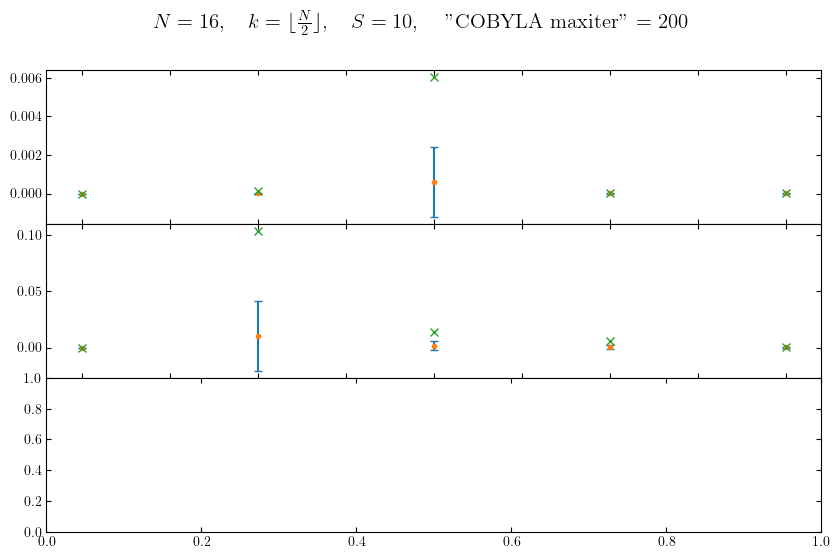

In [5]:
fig, ax = plt.subplots(3,1, figsize=(10,6))
fig.suptitle(r'$N=16, \quad k=\lfloor\frac{N}{2}\rfloor, \quad S=10, \quad$ "COBYLA maxiter" = 200',size=15)
plt.subplots_adjust(hspace=0)
# Shared x-values
n_layers = [1 + i for i in range(len(list(final_results_1.keys())))]
err_scaling = 1

# Plottig stuff
ax[0].errorbar(n_layers, [final_results_1[key][0] for key in list(final_results_1.keys())], yerr = [err_scaling*final_results_1[key][1] for key in list(final_results_1.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[0].plot(n_layers,[final_results_1[key][0] for key in list(final_results_1.keys())], 'o', ms=3)
ax[0].plot(n_layers,[final_results_1[key][2] for key in list(final_results_1.keys())], 'x', ms=6, label='best found')

ax[1].errorbar(n_layers, [final_results_2[key][0] for key in list(final_results_2.keys())], yerr = [err_scaling*final_results_2[key][1] for key in list(final_results_2.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[1].plot(n_layers,[final_results_2[key][0] for key in list(final_results_2.keys())], 'o', ms=3)
ax[1].plot(n_layers,[final_results_2[key][2] for key in list(final_results_2.keys())], 'x', ms=6, label='best found')

ax[2].errorbar(n_layers, [final_results_3[key][0] for key in list(final_results_3.keys())], yerr = [err_scaling*final_results_3[key][1] for key in list(final_results_3.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[2].plot(n_layers,[final_results_3[key][0] for key in list(final_results_3.keys())], 'o', ms=3)
ax[2].plot(n_layers,[final_results_3[key][2] for key in list(final_results_3.keys())], 'x', ms=6, label='best found')



ax[0].text(2.225,0.5,'Only Mixer',size=14)
ax[1].text(2.05,0.5,r'Mixer \& Z-phase',size=14)
ax[2].text(2.3,0.105,r'QAOA',size=14)

_y_ticks_ = [0.0,0.25,0.50,0.75,1.00]
for _ax_ in range(3):
    ax[_ax_].set_xlim(0.5,5.5)
    if _ax_ != 3:
        ax[_ax_].set_ylim(-0.05,1.25)
        ax[_ax_].hlines(0,0.5,5.5, ls='--',color='k',lw=1)
        ax[_ax_].hlines(1,0.5,5.5, ls='--',color='k',lw=1)
        ax[_ax_].set_yticks(_y_ticks_)
        ax[_ax_].set_yticklabels([str(v) for v in _y_ticks_])
    """if _ax_ == 2:
        _y_ticks_2 = [0.0,0.10,0.20,0.25]
        ax[_ax_].hlines(0,0.5,5.5, ls='--',color='k',lw=1)
        ax[_ax_].set_yticks(_y_ticks_2)
        ax[_ax_].set_yticklabels([str(v) for v in _y_ticks_2])
        ax[_ax_].set_ylim(-0.02,0.3)"""

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[1].set_ylabel(r'$\mathbb{P}[\ket{\psi}_{\text{opt}}]$', size=20)

ax[0].legend(loc=(-0.1,1.05),fontsize=12)

ax[2].set_xticks(n_layers)
ax[2].set_xticklabels([str(layer) for layer in n_layers], size=14)
ax[2].set_xlabel(r'Nr. layers', size=16)


plt.savefig('plots/probabilities_N16.png', dpi=300)
plt.show()

In [7]:
results_1, results_2, results_3 = {}, {}, {} 
for file_name in os.listdir('datasets'):
    if file_name != '.DS_Store':
        with h5py.File('datasets/'+file_name) as f:
            Normalized_cost = f['Normalized_cost'][()]
            
            if f['type'][()] == 1:
                if f"layer_{f['layers'][()]}" not in list(results_1.keys()):
                    results_1[f"layer_{f['layers'][()]}"] = [Normalized_cost]
                else:
                    results_1[f"layer_{f['layers'][()]}"].append(Normalized_cost)
            if f['type'][()] == 2:
                if f"layer_{f['layers'][()]}" not in list(results_2.keys()):
                    results_2[f"layer_{f['layers'][()]}"] = [Normalized_cost]
                else:
                    results_2[f"layer_{f['layers'][()]}"].append(Normalized_cost)
            if f['type'][()] == 4:
                if f"layer_{f['layers'][()]}" not in list(results_3.keys()):
                    results_3[f"layer_{f['layers'][()]}"] = [Normalized_cost]
                else:
                    results_3[f"layer_{f['layers'][()]}"].append(Normalized_cost)


In [8]:
final_results_1, final_results_2 = {}, {}
for layer in np.sort(list(results_1.keys())):
    final_results_1[layer] = (np.mean(results_1[layer]), np.std(results_1[layer]), np.max(results_1[layer]))
for layer in np.sort(list(results_2.keys())):
    final_results_2[layer] = (np.mean(results_2[layer]), np.std(results_2[layer]), np.max(results_2[layer]))


In [9]:
final_results_1

{'layer_1': (0.38660405297945666, 0.21281202926620138, 0.7421758098507379),
 'layer_2': (0.42447715152262655, 0.14139170456847802, 0.7416981421069017),
 'layer_3': (0.34383936570801277, 0.11777824394398544, 0.6046286024765019),
 'layer_4': (0.36213993999067545, 0.1457711680843436, 0.5465627559431921),
 'layer_5': (0.4179181768844941, 0.09802991187349405, 0.5976780571091911)}

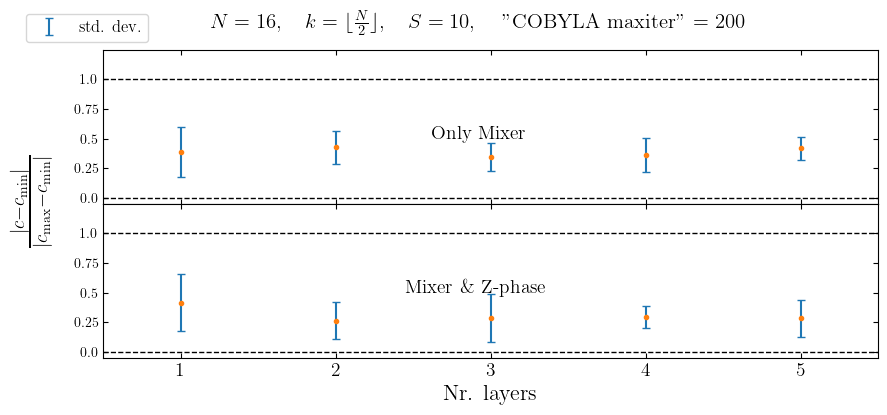

In [10]:
fig, ax = plt.subplots(2,1, figsize=(10,4))
fig.suptitle(r'$N=16, \quad k=\lfloor\frac{N}{2}\rfloor, \quad S=10, \quad$ "COBYLA maxiter" = 200',size=15)
plt.subplots_adjust(hspace=0)
# Shared x-values
n_layers = [1 + i for i in range(len(list(final_results_1.keys())))]
err_scaling = 1

# Plottig stuff
ax[0].errorbar(n_layers, [final_results_1[key][0] for key in list(final_results_1.keys())], yerr = [err_scaling*final_results_1[key][1] for key in list(final_results_1.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[0].plot(n_layers,[final_results_1[key][0] for key in list(final_results_1.keys())], 'o', ms=3)

ax[1].errorbar(n_layers, [final_results_2[key][0] for key in list(final_results_2.keys())], yerr = [err_scaling*final_results_2[key][1] for key in list(final_results_2.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[1].plot(n_layers,[final_results_2[key][0] for key in list(final_results_2.keys())], 'o', ms=3)


ax[0].text(2.625,0.5,'Only Mixer',size=14)
ax[1].text(2.45,0.5,r'Mixer \& Z-phase',size=14)

_y_ticks_ = [0.0,0.25,0.50,0.75,1.00]
for _ax_ in range(2):
    ax[_ax_].set_xlim(0.5,5.5)
    ax[_ax_].set_ylim(-0.05,1.25)
    ax[_ax_].hlines(0,0.5,5.5, ls='--',color='k',lw=1)
    ax[_ax_].hlines(1,0.5,5.5, ls='--',color='k',lw=1)
    ax[_ax_].set_yticks(_y_ticks_)
    ax[_ax_].set_yticklabels([str(v) for v in _y_ticks_])


ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[1].text(-0.1,1,r'$\frac{|c-c_{\textrm{min}}|}{|c_{\textrm{max}}-c_{\textrm{min}}|}$',rotation=90, size=20)

ax[0].legend(loc=(-0.1,1.05),fontsize=12)

ax[1].set_xticks(n_layers)
ax[1].set_xticklabels([str(layer) for layer in n_layers], size=14)
ax[1].set_xlabel(r'Nr. layers', size=16)


plt.savefig('plots/costs_N16.png', dpi=300)
plt.show()

In [20]:
results_1, results_2, results_3 = {}, {}, {} 
for file_name in os.listdir('datasets'):
    if file_name != '.DS_Store':
        with h5py.File('datasets/'+file_name) as f:
            a = f['Min_cost_state'][()]
            b = f['Final_circuit_sample_probabilities'][()]
            c = f['Final_circuit_sample_states'][()]
            min_state_prob = None
            for idx in range(len(c)):
                if np.all(a == c[idx]):
                    min_state_prob = b[idx]
            if min_state_prob is None:
                min_state_prob = 0.0
            if f['type'][()] == 1:
                if f['N'][()] not in list(results_1.keys()):
                    results_1[f['N'][()]] = [min_state_prob]
                else:
                    results_1[f['N'][()]].append(min_state_prob)
            if f['type'][()] == 2:
                if f['N'][()] not in list(results_2.keys()):
                    results_2[f['N'][()]] = [min_state_prob]
                else:
                    results_2[f['N'][()]].append(min_state_prob)
            if f['type'][()] == 4:
                if f['N'][()] not in list(results_3.keys()):
                    results_3[f['N'][()]] = [min_state_prob]
                else:
                    results_3[f['N'][()]].append(min_state_prob)
                    
final_results_1, final_results_2, final_results_3 = {}, {}, {}
for layer in np.sort(list(results_1.keys())):
    final_results_1[layer] = (np.mean(results_1[layer]), np.std(results_1[layer]), np.max(results_1[layer]))
for layer in np.sort(list(results_2.keys())):
    final_results_2[layer] = (np.mean(results_2[layer]), np.std(results_2[layer]), np.max(results_2[layer]))
for layer in np.sort(list(results_3.keys())):
    final_results_3[layer] = (np.mean(results_3[layer]), np.std(results_3[layer]), np.max(results_3[layer]))

In [24]:
final_results_3

{2: (0.04956592487307802, 0.10480848561167143, 0.451088264827553),
 3: (0.2439829327714337, 0.16683767915656458, 0.574393085598771),
 4: (0.10338758511636197, 0.13523944555015152, 0.7254309839126),
 5: (0.14428104083235763, 0.14511722576925426, 0.720960516903449),
 6: (0.05233905859186148, 0.07967691722960087, 0.532268747359621),
 7: (0.03771991900510302, 0.04098536079795149, 0.189020878337882),
 8: (0.03151644652126616, 0.07281880890908617, 0.468537151908083)}

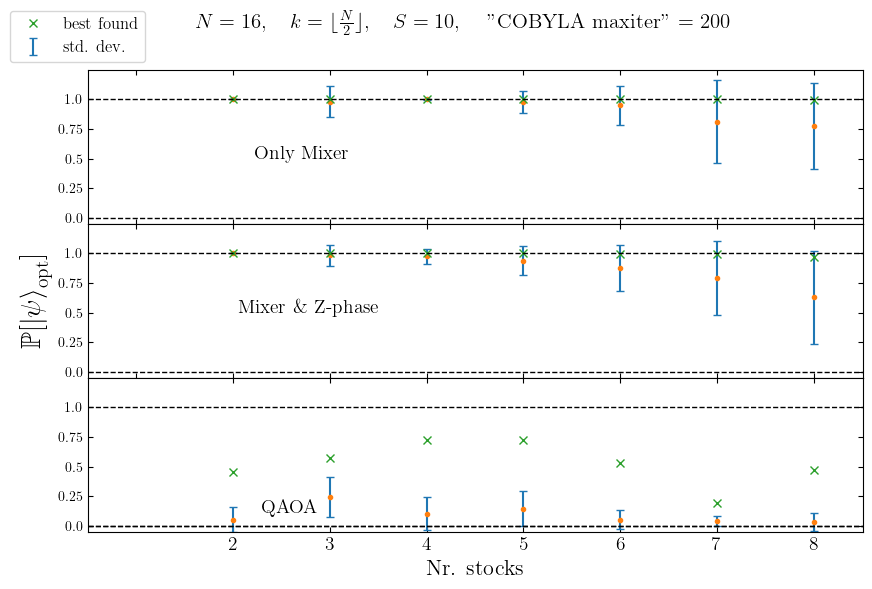

In [26]:
fig, ax = plt.subplots(3,1, figsize=(10,6))
fig.suptitle(r'$N=16, \quad k=\lfloor\frac{N}{2}\rfloor, \quad S=10, \quad$ "COBYLA maxiter" = 200',size=15)
plt.subplots_adjust(hspace=0)
# Shared x-values
n_vals = [2 + i for i in range(len(list(final_results_1.keys())))]
err_scaling = 1

# Plottig stuff
ax[0].errorbar(n_vals, [final_results_1[key][0] for key in list(final_results_1.keys())], yerr = [err_scaling*final_results_1[key][1] for key in list(final_results_1.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[0].plot(n_vals,[final_results_1[key][0] for key in list(final_results_1.keys())], 'o', ms=3)
ax[0].plot(n_vals,[final_results_1[key][2] for key in list(final_results_1.keys())], 'x', ms=6, label='best found')

ax[1].errorbar(n_vals, [final_results_2[key][0] for key in list(final_results_2.keys())], yerr = [err_scaling*final_results_2[key][1] for key in list(final_results_2.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[1].plot(n_vals,[final_results_2[key][0] for key in list(final_results_2.keys())], 'o', ms=3)
ax[1].plot(n_vals,[final_results_2[key][2] for key in list(final_results_2.keys())], 'x', ms=6, label='best found')

ax[2].errorbar(n_vals, [final_results_3[key][0] for key in list(final_results_3.keys())], yerr = [err_scaling*final_results_3[key][1] for key in list(final_results_3.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[2].plot(n_vals,[final_results_3[key][0] for key in list(final_results_3.keys())], 'o', ms=3)
ax[2].plot(n_vals,[final_results_3[key][2] for key in list(final_results_3.keys())], 'x', ms=6, label='best found')



ax[0].text(2.225,0.5,'Only Mixer',size=14)
ax[1].text(2.05,0.5,r'Mixer \& Z-phase',size=14)
ax[2].text(2.3,0.105,r'QAOA',size=14)

_y_ticks_ = [0.0,0.25,0.50,0.75,1.00]
for _ax_ in range(2):
    if _ax_ != 3:
        ax[_ax_].set_ylim(-0.05,1.25)
        ax[_ax_].hlines(0,0.5,max(n_vals)+0.5, ls='--',color='k',lw=1)
        ax[_ax_].hlines(1,0.5,max(n_vals)+0.5, ls='--',color='k',lw=1)
        ax[_ax_].set_yticks(_y_ticks_)
        ax[_ax_].set_yticklabels([str(v) for v in _y_ticks_])
    if _ax_ == 2:
        ax[_ax_].hlines(0,0.5,max(n_vals)+0.5, ls='--',color='k',lw=1)
        ax[_ax_].set_yticks(_y_ticks_)
        ax[_ax_].set_yticklabels([str(v) for v in _y_ticks_])
        ax[_ax_].set_ylim(-0.05,1.25)


ax[0].set_xticklabels([])
ax[0].set_xticklabels([])
ax[1].set_ylabel(r'$\mathbb{P}[\ket{\psi}_{\text{opt}}]$', size=20)

ax[0].legend(loc=(-0.1,1.05),fontsize=12)

ax[2].set_xticks(n_vals)
ax[2].set_xticklabels([str(n) for n in n_vals], size=14)
ax[2].set_xlabel(r'Nr. stocks', size=16)


plt.savefig('plots/probabilities_varying_N.png', dpi=300)
plt.show()

In [33]:
results_1, results_2, results_3 = {}, {}, {} 
for file_name in os.listdir('datasets'):
    if file_name != '.DS_Store':
        with h5py.File('datasets/'+file_name) as f:
            Normalized_cost = f['Normalized_cost'][()]
            if f['type'][()] == 1:
                if f['N'][()] not in list(results_1.keys()):
                    results_1[f['N'][()]] = [Normalized_cost]
                else:
                    results_1[f['N'][()]].append(Normalized_cost)
            if f['type'][()] == 2:
                if f['N'][()] not in list(results_2.keys()):
                    results_2[f['N'][()]] = [Normalized_cost]
                else:
                    results_2[f['N'][()]].append(Normalized_cost)
            if f['type'][()] == 4:
                if f['N'][()] not in list(results_3.keys()):
                    results_3[f['N'][()]] = [Normalized_cost]
                else:
                    results_3[f['N'][()]].append(Normalized_cost)
                    
final_results_1, final_results_2, final_results_3 = {}, {}, {}
for layer in np.sort(list(results_1.keys())):
    final_results_1[layer] = (np.mean(results_1[layer]), np.std(results_1[layer]), np.min(results_1[layer]))
for layer in np.sort(list(results_2.keys())):
    final_results_2[layer] = (np.mean(results_2[layer]), np.std(results_2[layer]), np.min(results_2[layer]))
for layer in np.sort(list(results_3.keys())):
    final_results_3[layer] = (np.mean(results_3[layer]), np.std(results_3[layer]), np.min(results_3[layer]))

In [35]:
final_results_1

{2: (5.816199559127657e-16, 2.0693998132498814e-15, 0.0),
 3: (3.623934717914826e-06, 2.536754302398484e-05, 0.0),
 4: (5.720904174646583e-16, 1.6498255947804169e-15, 0.0),
 5: (8.294964798638022e-05, 0.0005806475359013832, 0.0),
 6: (0.000871918697068682, 0.004387429007516383, 0.0),
 7: (0.004514892211861527, 0.019226027164993192, 0.0),
 8: (0.010980400463607107, 0.027948522056501342, 0.0)}

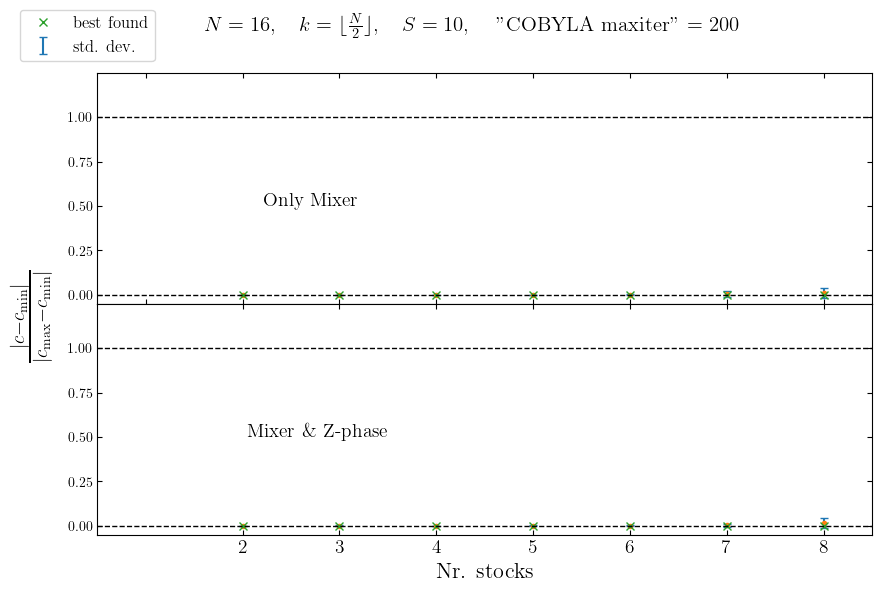

In [34]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
fig.suptitle(r'$N=16, \quad k=\lfloor\frac{N}{2}\rfloor, \quad S=10, \quad$ "COBYLA maxiter" = 200',size=15)
plt.subplots_adjust(hspace=0)
# Shared x-values
n_vals = [2 + i for i in range(len(list(final_results_1.keys())))]
err_scaling = 1

# Plottig stuff
ax[0].errorbar(n_vals, [final_results_1[key][0] for key in list(final_results_1.keys())], yerr = [err_scaling*final_results_1[key][1] for key in list(final_results_1.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[0].plot(n_vals,[final_results_1[key][0] for key in list(final_results_1.keys())], 'o', ms=3)
ax[0].plot(n_vals,[final_results_1[key][2] for key in list(final_results_1.keys())], 'x', ms=6, label='best found')

ax[1].errorbar(n_vals, [final_results_2[key][0] for key in list(final_results_2.keys())], yerr = [err_scaling*final_results_2[key][1] for key in list(final_results_2.keys())], capsize=3, ls='None', label=f'std. dev.')
ax[1].plot(n_vals,[final_results_2[key][0] for key in list(final_results_2.keys())], 'o', ms=3)
ax[1].plot(n_vals,[final_results_2[key][2] for key in list(final_results_2.keys())], 'x', ms=6, label='best found')


ax[0].text(2.225,0.5,'Only Mixer',size=14)
ax[1].text(2.05,0.5,r'Mixer \& Z-phase',size=14)

_y_ticks_ = [0.0,0.25,0.50,0.75,1.00]
for _ax_ in range(2):
    ax[_ax_].set_xlim(0.5,max(n_vals)+0.5)
    ax[_ax_].set_ylim(-0.05,1.25)
    ax[_ax_].hlines(0,0.5,max(n_vals)+0.5, ls='--',color='k',lw=1)
    ax[_ax_].hlines(1,0.5,max(n_vals)+0.5, ls='--',color='k',lw=1)
    ax[_ax_].set_yticks(_y_ticks_)

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[1].text(-0.4,1,r'$\frac{|c-c_{\textrm{min}}|}{|c_{\textrm{max}}-c_{\textrm{min}}|}$',rotation=90, size=20)

ax[0].legend(loc=(-0.1,1.05),fontsize=12)

ax[1].set_xticks(n_vals)
ax[1].set_xticklabels([str(n) for n in n_vals], size=14)
ax[1].set_xlabel(r'Nr. stocks', size=16)


plt.savefig('plots/cost_varying_N.png', dpi=300)
plt.show()